In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
cwd = os.getcwd()
maindir = os.path.dirname(cwd)
print(maindir)

filepath = os.path.join(maindir,'data/external')
#os.listdir(filepath)

/Users/maureenkeenan/Desktop/Kaggle/WiDs_Datathon_2020


In [5]:
df = pd.read_csv(os.path.join(filepath,'training_v2.csv'))
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [94]:
# Look at our target variable: hospital_death
df.groupby('hospital_death').hospital_death.count()

hospital_death
0    83798
1     7915
Name: hospital_death, dtype: int64

In [95]:
# Change this to text to use with Seaborn
lgd = dict({0:'Survived',1:'Died'})
df['Survived'] = df['hospital_death'].map(lgd)

In [87]:
categories = pd.read_csv(os.path.join(filepath,'WiDS Datathon 2020 Dictionary.csv'))
print(categories['Category'].unique())

identifier = categories[categories['Category']=='identifier']['Variable Name'].tolist()
demographic = categories[categories['Category']=='demographic']['Variable Name'].tolist()
Acov = categories[categories['Category']=='APACHE covariate']['Variable Name'].tolist()
vitals = categories[categories['Category']=='vitals']['Variable Name'].tolist()


['identifier' 'demographic' 'APACHE covariate' 'vitals' 'labs'
 'labs blood gas' 'APACHE prediction' 'APACHE comorbidity'
 'APACHE grouping' 'GOSSIS example prediction']


                  count   sum
ethnicity                    
African American   9547   750
Asian              1129    93
Caucasian         70684  6168
Hispanic           3796   376
Native American     788    70
Other/Unknown      4374   353


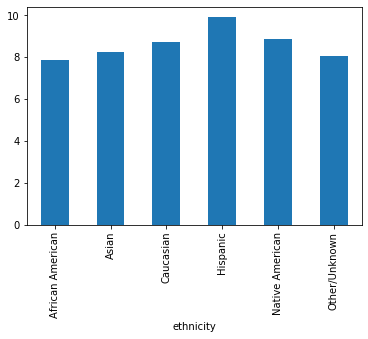

In [84]:
df_et = df.groupby('ethnicity').hospital_death.agg(['count','sum'])
print(df_et)
df_et['percent'] = df_et.iloc[:,1]/df_et.iloc[:,0]*100
df_et['percent'].plot(kind='bar')
plt.show()

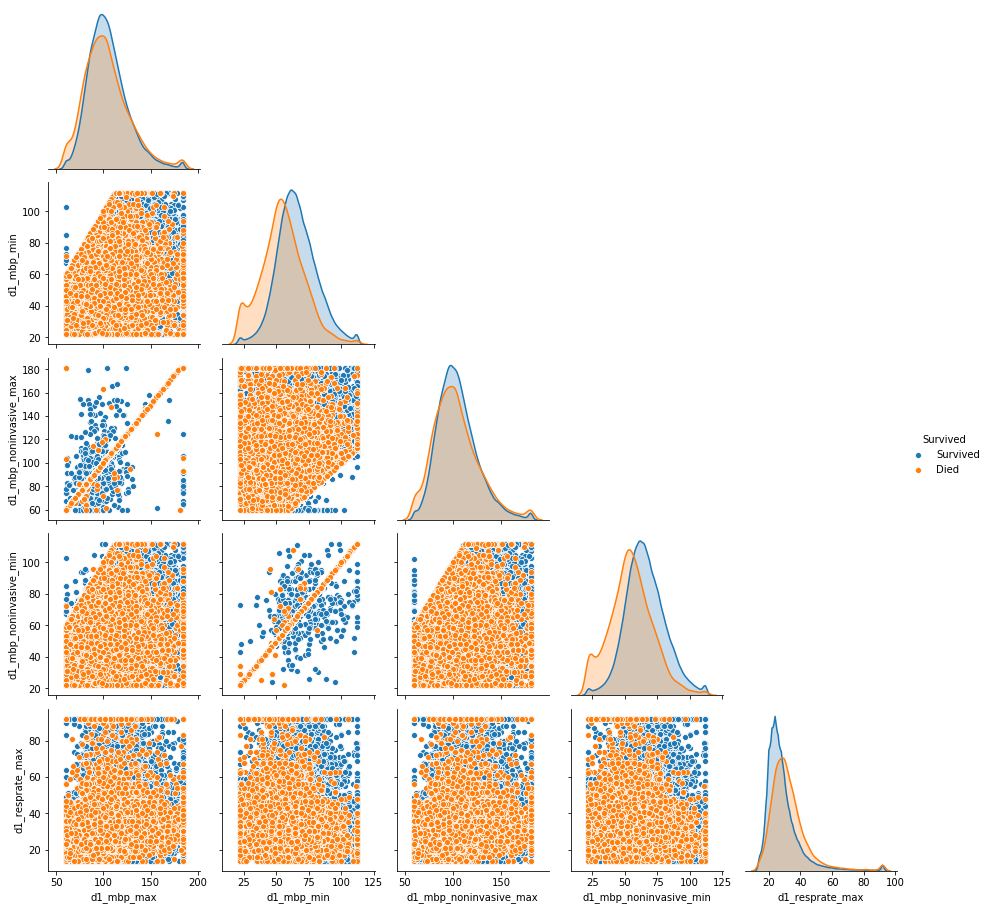

In [91]:
import seaborn as sns
g = sns.pairplot(df, vars=vitals[10:15],hue='Survived',corner=True)

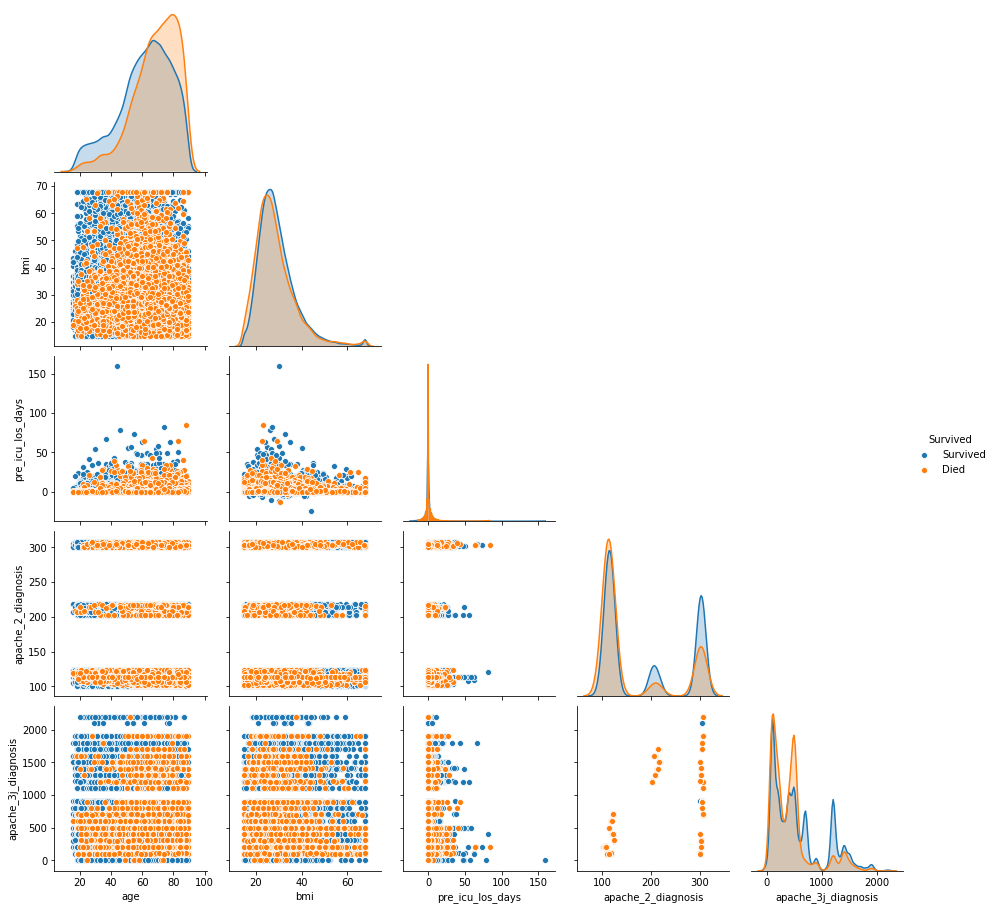

In [70]:
import seaborn as sns
g = sns.pairplot(df, vars=['age','bmi','pre_icu_los_days','apache_2_diagnosis', 'apache_3j_diagnosis'],hue='Survived',corner=True)